##Reading from directories and preprocessing stage

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [46]:
!ls "/content/drive/My Drive/"

 360TS_Setup_Mini.exe		       ex1data1.txt	     Scanned_20180528-1528.pdf
 AP1401-2-HW5-main_Sepehr9923004.zip   movies_complete.csv   Sepehr_kmeans
'Colab Notebooks'		       original.ipynb	     tumor_classification
 Crop_MRI_data			      'sanaati (2).zip'      tumor_dataset_for_model


In [47]:
image_directory  = "/content/drive/My Drive/tumor_classification"

In [48]:
classes = !ls "/content/drive/My Drive/tumor_classification"
print(classes[0])

glioma	meningioma  pituitary_tumor


In [49]:
#create classes ------
classes = classes[0].split()
print(classes)

['glioma', 'meningioma', 'pituitary_tumor']


In [50]:
glioma = !ls "/content/drive/My Drive/tumor_classification/glioma"
meningioma = !ls "/content/drive/My Drive/tumor_classification/meningioma"
pituitary_tumor = !ls "/content/drive/My Drive/tumor_classification/pituitary_tumor"

In [51]:
print(glioma)

['100416_1350.png     MR026175C_1993.png\tMR037458C_2726.png  MR048994_2434.png\tMR051461_2917.png', '100416_1351.png     MR026175C_1994.png\tMR037458C_2727.png  MR048994_2435.png\tMR051461_2918.png', '100416_1352.png     MR026175C_1995.png\tMR037458C_2728.png  MR048994_2436.png\tMR051461_2919.png', '100416_1353.png     MR026175C_1996.png\tMR037458C_2729.png  MR048994_2437.png\tMR051461_2920.png', '100820_122.png\t    MR026175C_2325.png\tMR038469_2145.png   MR048994_2438.png\tMR051461_2921.png', '100820_124.png\t    MR026175C_2326.png\tMR038469_2146.png   MR048994_2439.png\tMR051461_2922.png', '100820_1354.png     MR026175C_2327.png\tMR038469_2147.png   MR048994_2440.png\tMR051461_2923.png', '100820_1355.png     MR026175C_2328.png\tMR038469_2148.png   MR048994_2845.png\tMR051461B_2011.png', '100820_1356.png     MR026175C_2329.png\tMR038469_2149.png   MR048994_2846.png\tMR051461B_2012.png', '100820_1357.png     MR026175C_2330.png\tMR038469_2150.png   MR048994_2847.png\tMR051461B_2013.pn

In [52]:
contents = []
directory_contents = {}
#glioma
for content in glioma:
  c = content.split()
  contents.extend(c)
directory_contents['glioma'] = contents
contents = []

#meningioma
for content in meningioma:
  c = content.split()
  contents.extend(c)
directory_contents['meningioma'] = contents
contents = []

#glioma
for content in pituitary_tumor:
  c = content.split()
  contents.extend(c)
directory_contents['pituitary_tumor'] = contents
contents = []

In [53]:
print(len(directory_contents['pituitary_tumor']))
print(len(directory_contents['glioma']))
print(len(directory_contents['meningioma']))

930
1426
708


##Presenting the MRI images

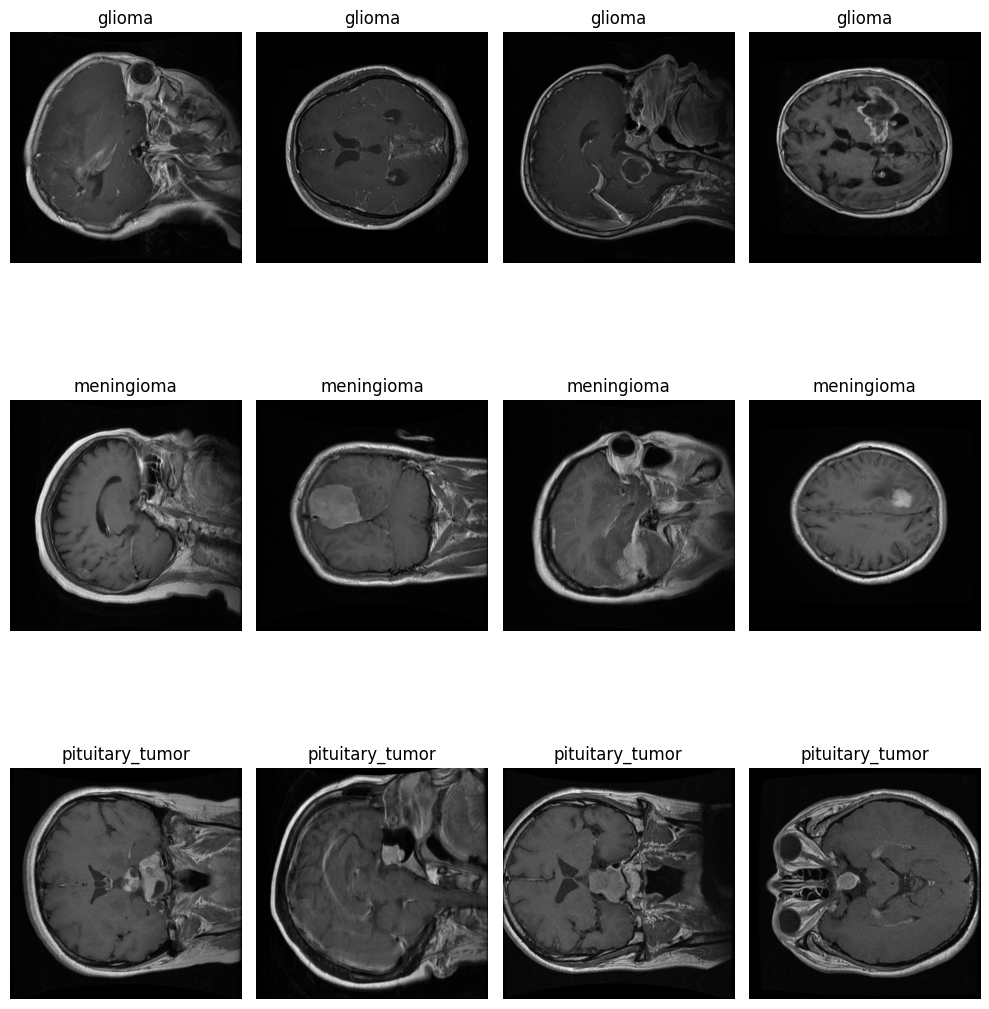

In [54]:
fig, axs = plt.subplots(3, 4, figsize=(10, 12))
for c in classes:
  random.shuffle(directory_contents[c])
  photos = directory_contents[c][:4]
  for i in range (4):
    path =  image_directory + "/" + c + "/" + photos[i]
    image = mpimg.imread(path)
    if c == "glioma":
      axs[0,i].imshow(image, cmap='gray')
      axs[0,i].axis('off')
      axs[0,i].set_title(c)
    if c == "meningioma":
      axs[1,i].imshow(image, cmap='gray')
      axs[1,i].axis('off')
      axs[1,i].set_title(c)
    if c == "pituitary_tumor":
      axs[2,i].imshow(image, cmap='gray')
      axs[2,i].axis('off')
      axs[2,i].set_title(c)
plt.tight_layout()
plt.show()


##Creating test and train directories and data for the model

In [58]:
output_dir = "/content/drive/MyDrive/tumor_dataset_for_model_adam"

# Create train and test directories
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

for class_name in classes:
    # List images
    class_path = os.path.join(image_directory, class_name)
    images = os.listdir(class_path)

    # Shuffle and select 700 images
    random.shuffle(images)
    selected_images = images[:700]

    # Split into train (500) and test (200)
    train_images = selected_images[:500]
    test_images = selected_images[500:]

    # Copy files to train/test directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

In [59]:
x = !ls "/content/tumor_dataset_for_model_adam/train/glioma"

print(x)

['100416_1350.png     MR026175C_2329.png\tMR038469_2148.png   MR048994B_1884.png\tMR051461B_2014.png', '100416_1351.png     MR026175C_2330.png\tMR038469_2149.png   MR048994B_1885.png\tMR051461B_2015.png', '100416_1352.png     MR026175C_2331.png\tMR038469_2150.png   MR048994B_1886.png\tMR051461B_2549.png', '100820_122.png\t    MR026175E_2349.png\tMR038469_2151.png   MR048994B_1888.png\tMR051461B_2550.png', '100820_124.png\t    MR026175E_2350.png\tMR038469_2682.png   MR048994B_1890.png\tMR051461B_2551.png', '100820_1354.png     MR026175E_2351.png\tMR038469_2684.png   MR048994B_1891.png\tMR051461B_2552.png', '100820_1355.png     MR026175E_2353.png\tMR038469_2685.png   MR048994B_2249.png\tMR051586_2004.png', '100820_1356.png     MR026175E_2354.png\tMR038469_2686.png   MR048994B_2250.png\tMR051586_2005.png', '100820_1357.png     MR026175E_2355.png\tMR038469_2752.png   MR048994B_2252.png\tMR051586_2006.png', '100820_1358.png     MR026175E_2356.png\tMR038469_2753.png   MR048994B_2860.png\tMR0

In [101]:
train_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)


Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##Building up the deep learning models

In [137]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969,283 (7.51 MB)

 Trainable params: 1,969,283 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_29 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,811 (1.57 MB)

 Trainable params: 411,811 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,379 (364.76 KB)

 Trainable params: 93,379 (364.76 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model4.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_25 (Flatten)                 │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,973,443 (7.53 MB)

 Trainable params: 1,973,443 (7.53 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model5.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977,603 (7.54 MB)

 Trainable params: 1,977,603 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
model6 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model6.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,795 (3.21 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model7 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model7.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)                   │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_28 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,757,059 (6.70 MB)

 Trainable params: 1,757,059 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

##Training the model

In [146]:
# Compile the model
model1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
# Callbacks
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint1 = ModelCheckpoint('model1.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [148]:
history = model1.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping1, model_checkpoint1]
)

Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.5094 - loss: 0.9736
Epoch 1: val_loss improved from inf to 0.76373, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.5213 - loss: 0.9571 - val_accuracy: 0.5983 - val_loss: 0.7637
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.6459 - loss: 0.7407
Epoch 2: val_loss improved from 0.76373 to 0.72381, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.6476 - loss: 0.7353 - val_accuracy: 0.6450 - val_loss: 0.7238
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.7036 - loss: 0.6432
Epoch 3: val_loss improved from 0.72381 to 0.67457, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 299ms/step - accuracy: 0.7004 - loss: 0.6439 - val_accuracy: 0.6750 - val_loss: 0.6746
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.7149 - loss: 0.5888
Epoch 4: val_loss improved from 0.67457 to 0.65753, saving mode

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step


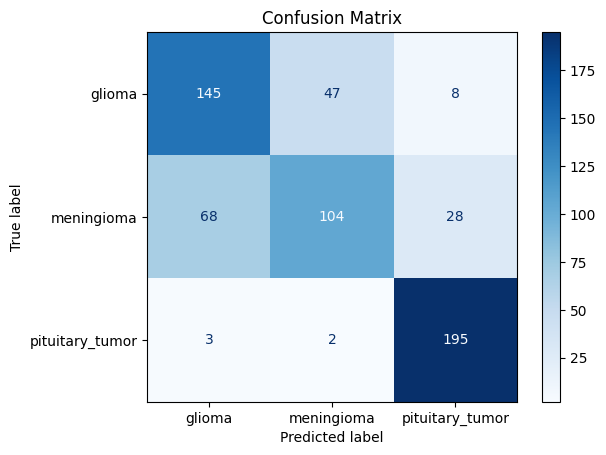

In [149]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model1.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


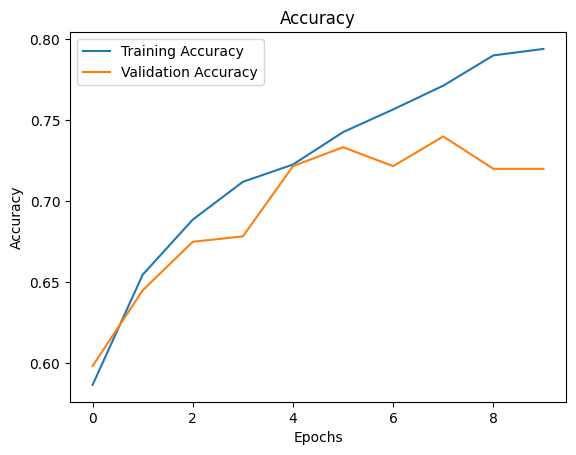

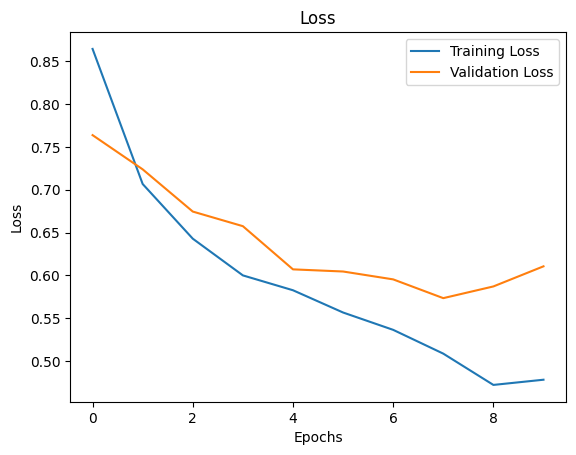

In [150]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [151]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model1.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.6838 - loss: 0.6621
Test Accuracy: 0.74, Test Loss: 0.57


In [155]:
# Compile the model
model2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
# Callbacks
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint2 = ModelCheckpoint('model2.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [157]:
history = model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping2, model_checkpoint2]
)

Epoch 1/10
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.4008 - loss: 1.0735
Epoch 1: val_loss improved from inf to 0.91561, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 327ms/step - accuracy: 0.4095 - loss: 1.0694 - val_accuracy: 0.5867 - val_loss: 0.9156
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.6259 - loss: 0.8627
Epoch 2: val_loss improved from 0.91561 to 0.81177, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.6240 - loss: 0.8568 - val_accuracy: 0.5867 - val_loss: 0.8118
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.6416 - loss: 0.7564
Epoch 3: val_loss improved from 0.81177 to 0.76640, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.6424 - loss: 0.7540 - val_accuracy: 0.6200 - val_loss: 0.7664
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.6575 - loss: 0.6987
Epoch 4: val_loss improved from 0.76640 to 0.72309, saving mode

In [158]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model2.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.5764 - loss: 0.8001
Test Accuracy: 0.74, Test Loss: 0.60


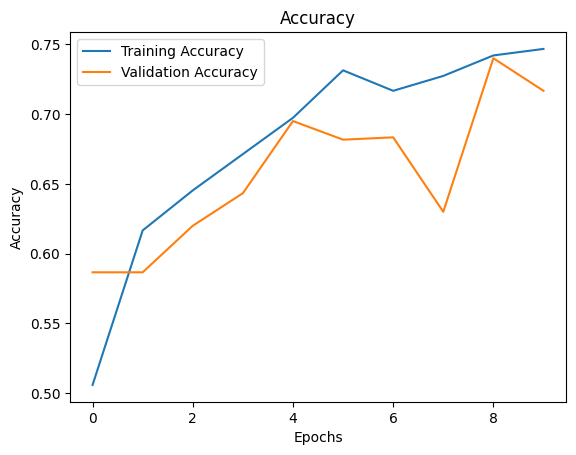

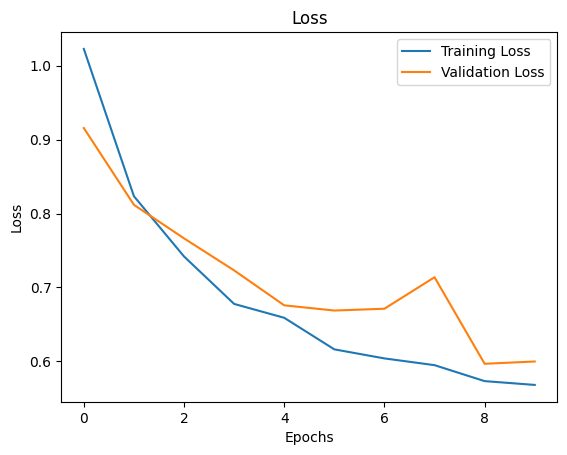

In [159]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step


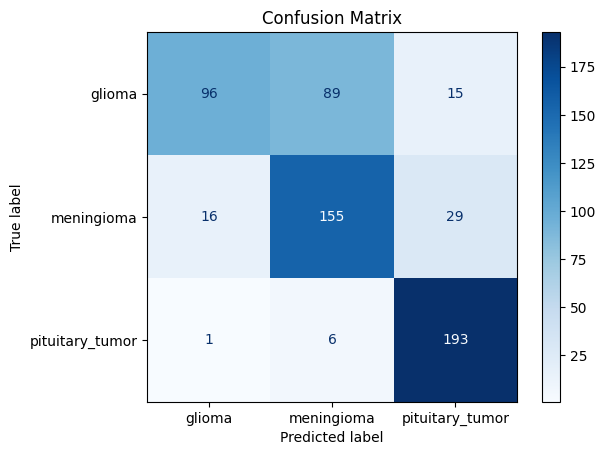

In [160]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [163]:
# Compile the model
model3.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint3 = ModelCheckpoint('model3.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history3 = model3.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping3, model_checkpoint3]
)


Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.4246 - loss: 1.0750
Epoch 1: val_loss improved from inf to 1.03176, saving model to model3.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.4356 - loss: 1.0726 - val_accuracy: 0.5350 - val_loss: 1.0318
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.5789 - loss: 1.0157
Epoch 2: val_loss improved from 1.03176 to 0.94339, saving model to model3.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.5804 - loss: 1.0117 - val_accuracy: 0.5617 - val_loss: 0.9434
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.5927 - loss: 0.9055
Epoch 3: val_loss improved from 0.94339 to 0.83047, saving model to model3.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - accuracy: 0.5949 - loss: 0.9016 - val_accuracy: 0.6033 - val_loss: 0.8305
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.6381 - loss: 0.7913
Epoch 4: val_loss improved from 0.83047 to 0.76345, saving mode

In [164]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model3.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.5936 - loss: 0.8039
Test Accuracy: 0.67, Test Loss: 0.68


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step


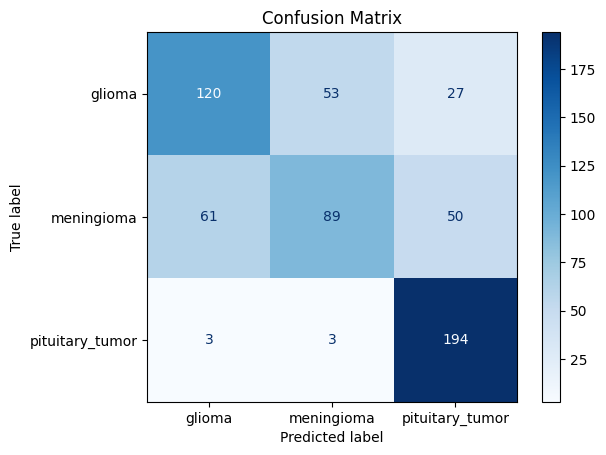

In [165]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model3.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

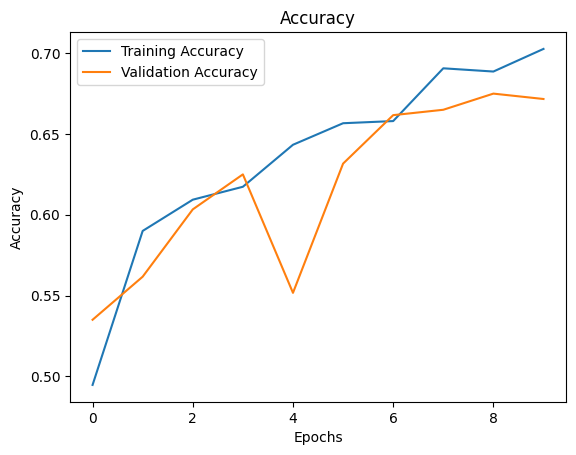

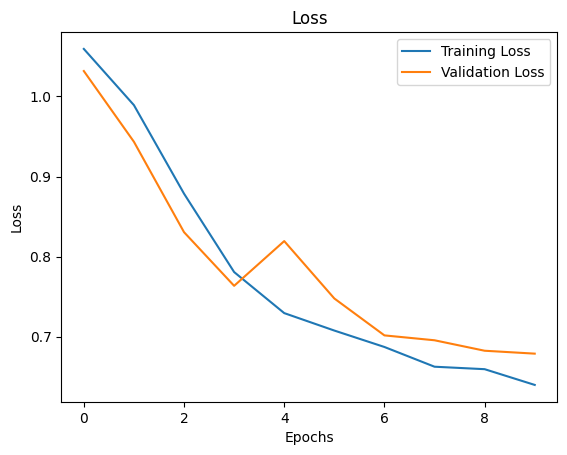

In [166]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [169]:
# Compile the model
model4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint4 = ModelCheckpoint('model4.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history4 = model4.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping4, model_checkpoint4]
)


Epoch 1/10
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.4908 - loss: 1.0408
Epoch 1: val_loss improved from inf to 0.87677, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.4966 - loss: 1.0341 - val_accuracy: 0.5650 - val_loss: 0.8768
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.6208 - loss: 0.8188
Epoch 2: val_loss improved from 0.87677 to 0.79969, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.6211 - loss: 0.8150 - val_accuracy: 0.5683 - val_loss: 0.7997
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.6612 - loss: 0.7108
Epoch 3: val_loss improved from 0.79969 to 0.73767, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.6600 - loss: 0.7127 - val_accuracy: 0.6233 - val_loss: 0.7377
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.6776 - loss: 0.6769
Epoch 4: val_loss improved from 0.73767 to 0.70887, saving mode

In [170]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model4.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.7134 - loss: 0.6073
Test Accuracy: 0.72, Test Loss: 0.59


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step


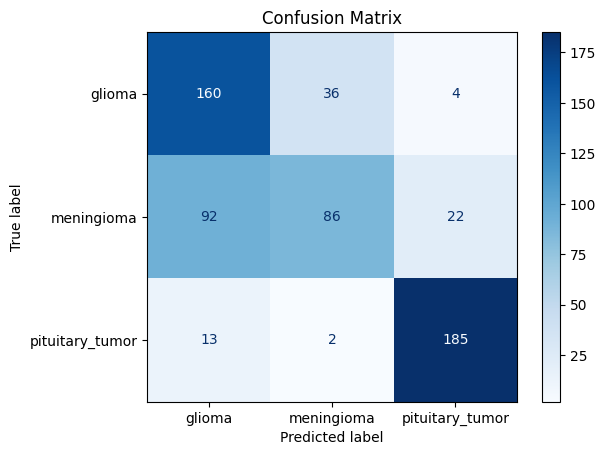

In [171]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model4.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

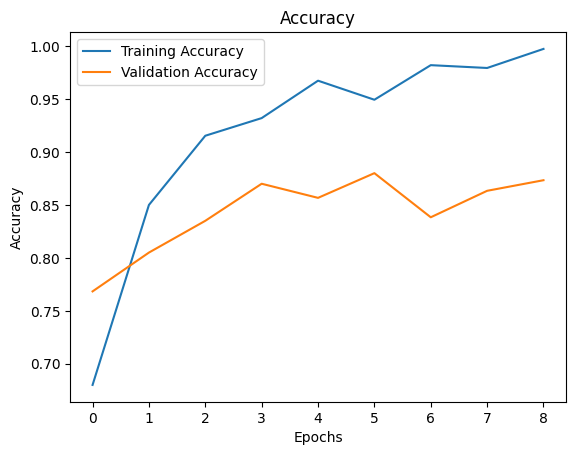

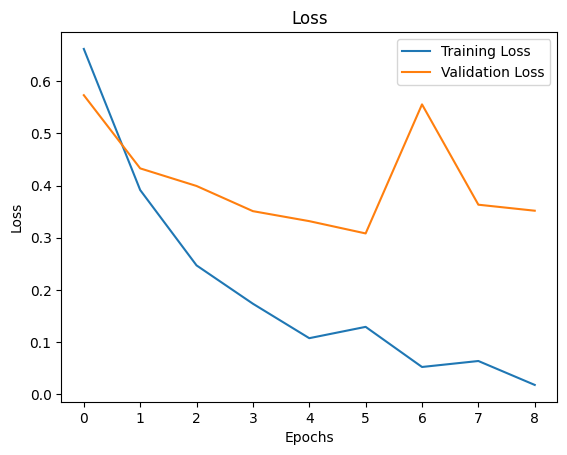

In [122]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [172]:
# Compile the model
model5.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping5 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint5 = ModelCheckpoint('model5.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history5 = model5.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping5, model_checkpoint5]
)

Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.4220 - loss: 1.0713
Epoch 1: val_loss improved from inf to 0.90250, saving model to model5.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 323ms/step - accuracy: 0.4363 - loss: 1.0625 - val_accuracy: 0.5450 - val_loss: 0.9025
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.5937 - loss: 0.8445
Epoch 2: val_loss improved from 0.90250 to 0.77044, saving model to model5.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - accuracy: 0.5949 - loss: 0.8393 - val_accuracy: 0.5583 - val_loss: 0.7704
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.6477 - loss: 0.7185
Epoch 3: val_loss improved from 0.77044 to 0.71253, saving model to model5.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.6468 - loss: 0.7174 - val_accuracy: 0.6400 - val_loss: 0.7125
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.6583 - loss: 0.7306
Epoch 4: val_loss improved from 0.71253 to 0.66736, saving mode

In [173]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model5.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.5054 - loss: 0.8497
Test Accuracy: 0.72, Test Loss: 0.60


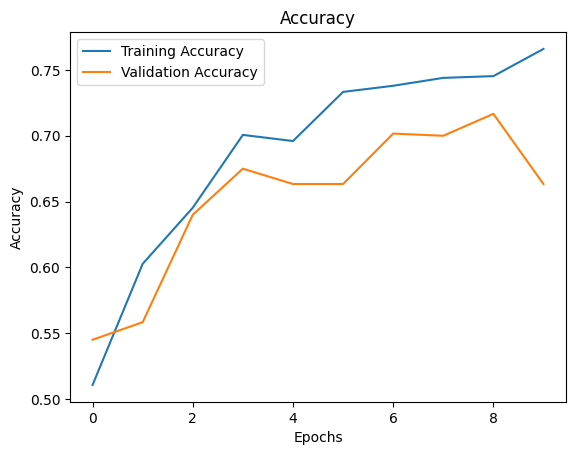

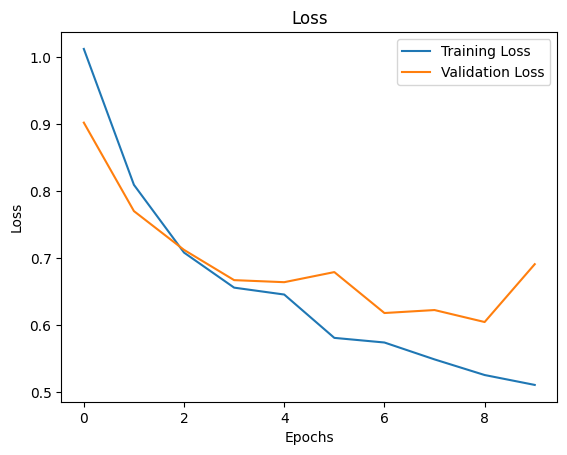

In [174]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step


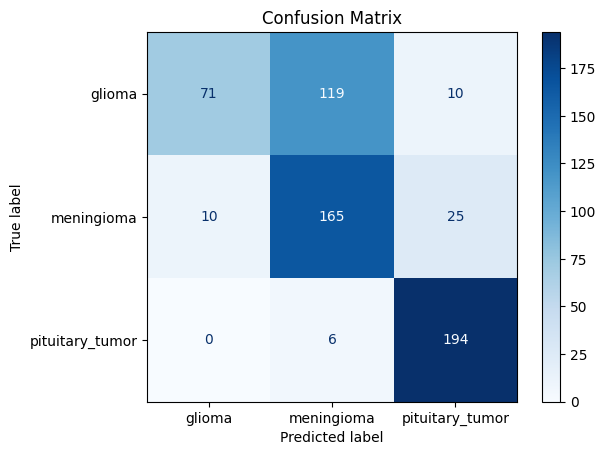

In [175]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model5.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [176]:
# Compile the model
model6.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping6 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint6 = ModelCheckpoint('model6.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history6 = model6.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping6, model_checkpoint6]
)

Epoch 1/10
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.4150 - loss: 1.0778
Epoch 1: val_loss improved from inf to 0.95332, saving model to model6.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.4185 - loss: 1.0762 - val_accuracy: 0.5517 - val_loss: 0.9533
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5832 - loss: 0.8998
Epoch 2: val_loss improved from 0.95332 to 0.78381, saving model to model6.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.5837 - loss: 0.8987 - val_accuracy: 0.6167 - val_loss: 0.7838
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.6380 - loss: 0.7250
Epoch 3: val_loss improved from 0.78381 to 0.74407, saving model to model6.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.6379 - loss: 0.7252 - val_accuracy: 0.6183 - val_loss: 0.7441
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6704 - loss: 0.7028
Epoch 4: val_loss improved from 0.74407 to 0.70711, saving mode

In [177]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model6.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.5082 - loss: 0.8559
Test Accuracy: 0.71, Test Loss: 0.62


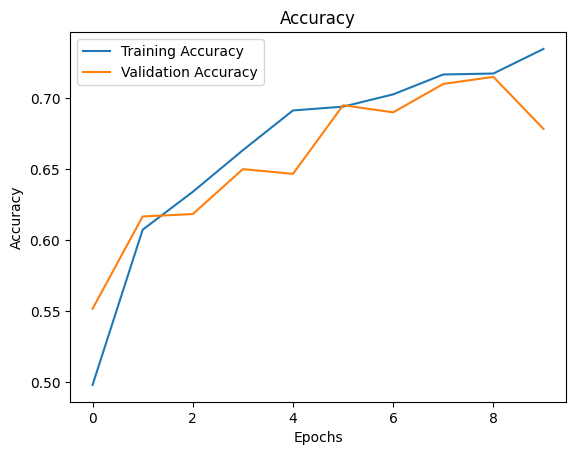

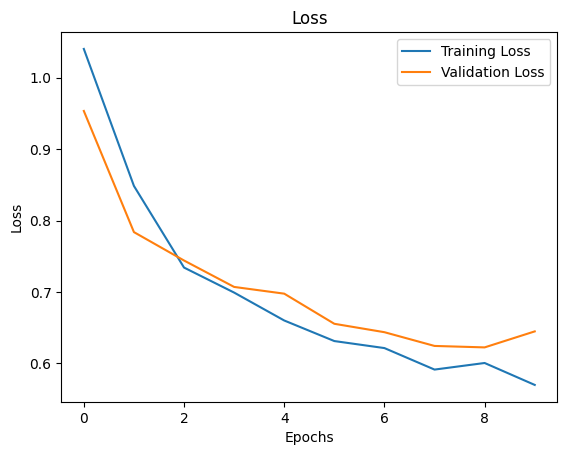

In [178]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step


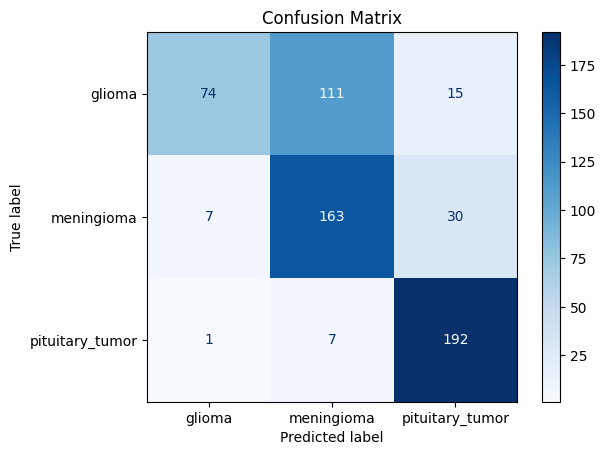

In [179]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model6.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [180]:
# Compile the model
model7.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping7 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint7 = ModelCheckpoint('model7.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history6 = model7.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping7, model_checkpoint7]
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.5428 - loss: 1.0321
Epoch 1: val_loss improved from inf to 0.87189, saving model to model7.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.5435 - loss: 1.0308 - val_accuracy: 0.5883 - val_loss: 0.8719
Epoch 2/10
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6095 - loss: 0.8309
Epoch 2: val_loss improved from 0.87189 to 0.76555, saving model to model7.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.6112 - loss: 0.8276 - val_accuracy: 0.6050 - val_loss: 0.7656
Epoch 3/10
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6325 - loss: 0.7467
Epoch 3: val_loss improved from 0.76555 to 0.75358, saving model to model7.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.6346 - loss: 0.7443 - val_accuracy: 0.6033 - val_loss: 0.7536
Epoch 4/10
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6592 - loss: 0.6893
Epoch 4: val_loss improved from 0.75358 to 0.73148, saving mode

In [181]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model7.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.7254 - loss: 0.6179
Test Accuracy: 0.71, Test Loss: 0.60


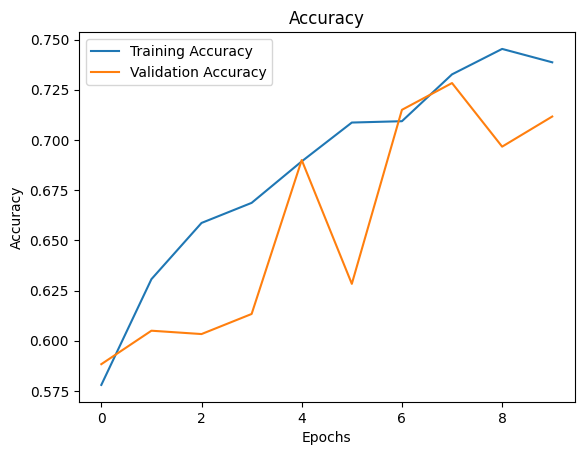

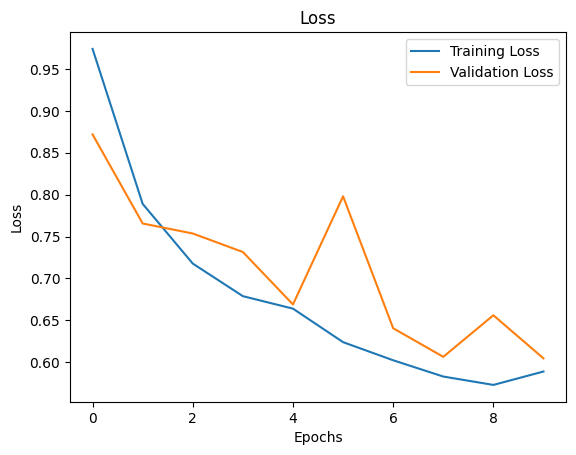

In [182]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step


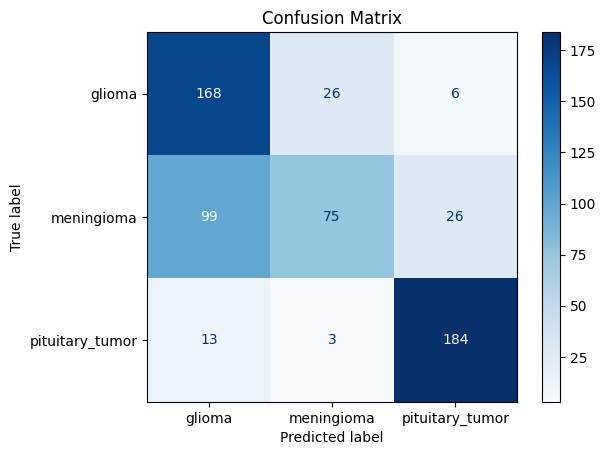

In [184]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

predictions = model7.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()